In [1]:
import numpy as np
import readgadget

In [4]:
snapshot = '/home/fdavilakurban/mnt/clemente/quijote/Snapshots/fiducial/0/snapdir_004/snap_004'

In [5]:
# read header
header   = readgadget.header(snapshot)
BoxSize  = header.boxsize/1e3  #Mpc/h
Nall     = header.nall         #Total number of particles
Masses   = header.massarr*1e10 #Masses of the particles in Msun/h
Omega_m  = header.omega_m      #value of Omega_m
Omega_l  = header.omega_l      #value of Omega_l
h        = header.hubble       #value of h
redshift = header.redshift     #redshift of the snapshot
Hubble   = 100.0*np.sqrt(Omega_m*(1.0+redshift)**3+Omega_l)#Value of H(z) in km/s/(Mpc/h)

print('BoxSize = %.3f Mpc/h'%BoxSize)
print('Total number of particles:',Nall)
print('Masses of the particles:',Masses, 'Msun/h')
print('Omega_m = %.3f'%Omega_m)
print('Omega_L = %.3f'%Omega_l)
print('h = %.3f'%h)
print('redshift = %.3f'%redshift)
print('H(z=%.1f)=%.3f (km/s)/(Mpc/h)'%(redshift,Hubble))

BoxSize = 1000.000 Mpc/h
Total number of particles: [        0 134217728         0         0         0         0]
Masses of the particles: [0.00000000e+00 6.56560934e+11 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00] Msun/h
Omega_m = 0.318
Omega_L = 0.682
h = 0.671
redshift = 0.000
H(z=0.0)=100.000 (km/s)/(Mpc/h)


In [6]:
mass_c = Masses[1]
N_c = Nall[1]
print('Mass of a DM particle = %.3e Msun/h'%mass_c)
print('Number of DM particles = %d'%N_c)

Mass of a DM particle = 6.566e+11 Msun/h
Number of DM particles = 134217728


In [7]:
# we can check the value of Omega_m
rho_crit = 2.775e11 #critical density at z=0 in (Msun/h)/(Mpc/h)^3
estimated_Omega_m = N_c*mass_c/BoxSize**3/rho_crit
print('%.4f should be similar to\n%.4f'%(estimated_Omega_m,Omega_m))

0.3176 should be similar to
0.3175


In [8]:
ptype = [1] #DM is 1, neutrinos is [2]
pos   = readgadget.read_block(snapshot, "POS ", ptype)/1e3 #positions in Mpc/h
vel   = readgadget.read_block(snapshot, "VEL ", ptype)     #peculiar velocities in km/s
ids   = readgadget.read_block(snapshot, "ID  ", ptype)-1   #IDs starting from 0

In [9]:
print('%.3f < X  < %.3f Mpc/h'%(np.min(pos[:,0]), np.max(pos[:,0])))
print('%.3f < Y  < %.3f Mpc/h'%(np.min(pos[:,1]), np.max(pos[:,1])))
print('%.3f < Z  < %.3f Mpc/h'%(np.min(pos[:,2]), np.max(pos[:,2])))
print('%.3f < Vx < %.3f km/s'%(np.min(vel[:,0]), np.max(vel[:,0])))
print('%.3f < Vy < %.3f km/s'%(np.min(vel[:,1]), np.max(vel[:,1])))
print('%.3f < Vz < %.3f km/s'%(np.min(vel[:,2]), np.max(vel[:,2])))
print('%d < IDs < %d'%(np.min(ids), np.max(ids)))

0.000 < X  < 999.992 Mpc/h
0.000 < Y  < 999.992 Mpc/h
0.000 < Z  < 999.992 Mpc/h
-5705.000 < Vx < 5865.000 km/s
-5071.000 < Vy < 5419.000 km/s
-5278.000 < Vz < 5785.000 km/s
0 < IDs < 134217727


In [10]:
# lets consider the particle number 10
print('position =',pos[10],'Mpc/h')
print('velocity =',vel[10],'km/s')
print('ID =',ids[10])

position = [986.432   32.8395  28.5895] Mpc/h
velocity = [-245.09375 -523.125   1021.875  ] km/s
ID = 785


In [12]:
particle1 = pos[3]
particle2 = pos[4]
print('Position of particle 1: (%.3f, %.3f, %.3f) Mpc/h'%(particle1[0], particle1[1], particle1[2]))
print('Position of particle 2: (%.3f, %.3f, %.3f) Mpc/h'%(particle2[0], particle2[1], particle2[2]))

Position of particle 1: (995.032, 31.848, 16.656) Mpc/h
Position of particle 2: (993.992, 32.622, 22.848) Mpc/h


In [13]:
# this would be the incorrect way to compute the distance
d = np.sqrt(np.sum((particle1-particle2)**2))
print('Incorrect distance = %.3f Mpc/h'%d)

# this would be the correct way to compute the distance
d = particle1-particle2
indexes = np.where(d>BoxSize/2)
d[indexes]-=BoxSize
indexes = np.where(d<-BoxSize/2)
d[indexes]+=BoxSize
d = np.sqrt(np.sum(d**2))
print('Correct distance   = %.3f Mpc/h'%d)


Incorrect distance = 6.326 Mpc/h
Correct distance   = 6.326 Mpc/h


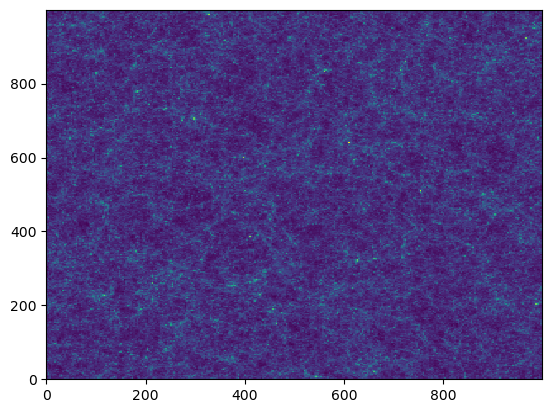

In [19]:
import matplotlib.pyplot as plt

plt.hist2d(pos[:,0],pos[:,1],300)
plt.show()